In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [ ]:
iris_outcome = pd.crosstab(index=iris["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Thông tin của bộ dữ liệu**

In [ ]:
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


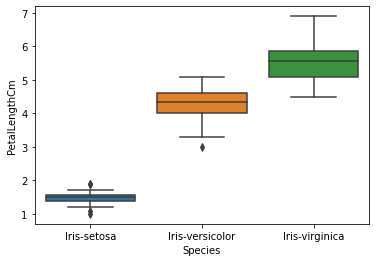

In [ ]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

**Loại bỏ các điểm Outliers**

In [ ]:
for column in iris.columns[0:-1]:
     for specy in iris["Species"].unique():
        Specy_type = iris[iris["Species"] == specy]
        Selected_column = Specy_type[column]
        q1=Selected_column.quantile(0.25)
        q3=Selected_column.quantile(0.75)
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        iris.drop(index = outlierss, inplace=True) # dropping outliers       

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([106], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([13, 22, 24, 44], dtype='int64')
Int64Index([98], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([23, 43], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             142 non-null    int64  
 1   SepalLengthCm  142 non-null    float64
 2   SepalWidthCm   142 non-null    float64
 3   PetalLengthCm  142 non-null    float64
 4   PetalWidthCm   142 non-null    float64
 5   Species        142 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
x = iris.iloc[:, [1, 2, 3,4]].values

**Đánh giá cách phân cụm bằng chỉ số Silhouette**

For n_clusters = 2 The average silhouette_score is : 0.6849950868614287
For n_clusters = 3 The average silhouette_score is : 0.5500518325487285
For n_clusters = 4 The average silhouette_score is : 0.4923125815323215
For n_clusters = 5 The average silhouette_score is : 0.48873999676235774
For n_clusters = 6 The average silhouette_score is : 0.38346434488338776
For n_clusters = 7 The average silhouette_score is : 0.3771739031847756
For n_clusters = 8 The average silhouette_score is : 0.3605699140881984
For n_clusters = 9 The average silhouette_score is : 0.3291136475419764
For n_clusters = 10 The average silhouette_score is : 0.31227634516659897


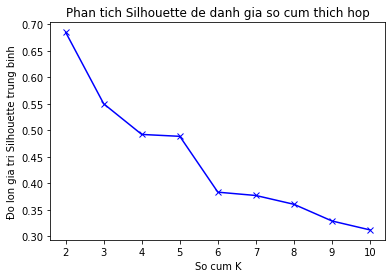

In [ ]:
silhouette_avg = []
for k in range(2,11):
    clusterer =KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300)
    clusterer.fit_predict(x)
    score = silhouette_score(x, clusterer.labels_, metric='euclidean')
    silhouette_avg.append(score)
    print("For n_clusters =",k,"The average silhouette_score is :",score)
plt.plot([2,3,4,5,6,7,8,9,10],silhouette_avg,'bx-')
plt.xlabel('So cum K') 
plt.ylabel('Đo lon gia tri Silhouette trung binh') 
plt.title('Phan tich Silhouette de danh gia so cum thich hop')
plt.show()

**Đánh giá cách phân cụm bằng thuật toán khuỷu tay**

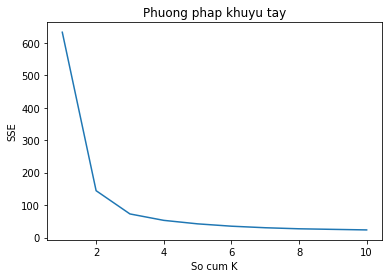

In [ ]:
from sklearn.cluster import KMeans
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Phuong phap khuyu tay')
plt.xlabel('So cum K')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

**Chạy thuật toán cuối cùng**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 600, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')
plt.scatter(x[:,0],x[:,1],s=20,c='black',label='setosa')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.